In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from random import randint
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer


%matplotlib inline

df_frogs = pd.read_csv("Frogs_MFCCs.csv", sep=',')

# Exploratory data analysis

In [ ]:
df_frogs.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [ ]:
df_frogs.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


Check presence of NaN values & types

In [ ]:
df_frogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

Verify class balance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


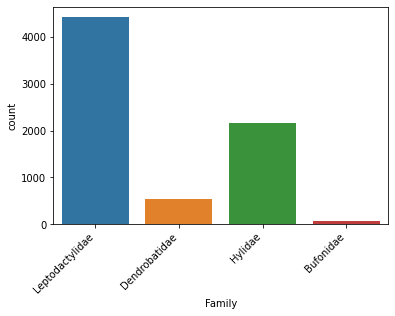

In [ ]:
g = sns.countplot(df_frogs['Family'])
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig("families.png", bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


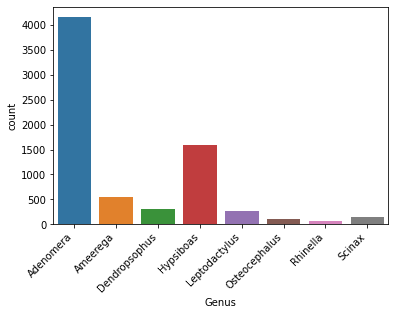

In [ ]:
g = sns.countplot(df_frogs['Genus'])
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig("genus.png", bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


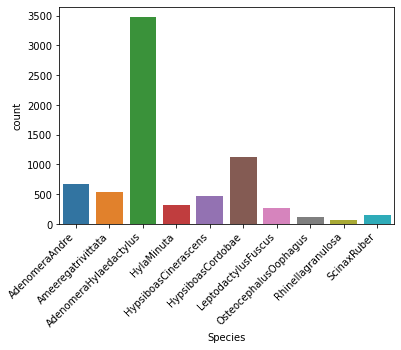

In [ ]:
g = sns.countplot(df_frogs['Species'])
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig("species.png", bbox_inches='tight')
plt.show()

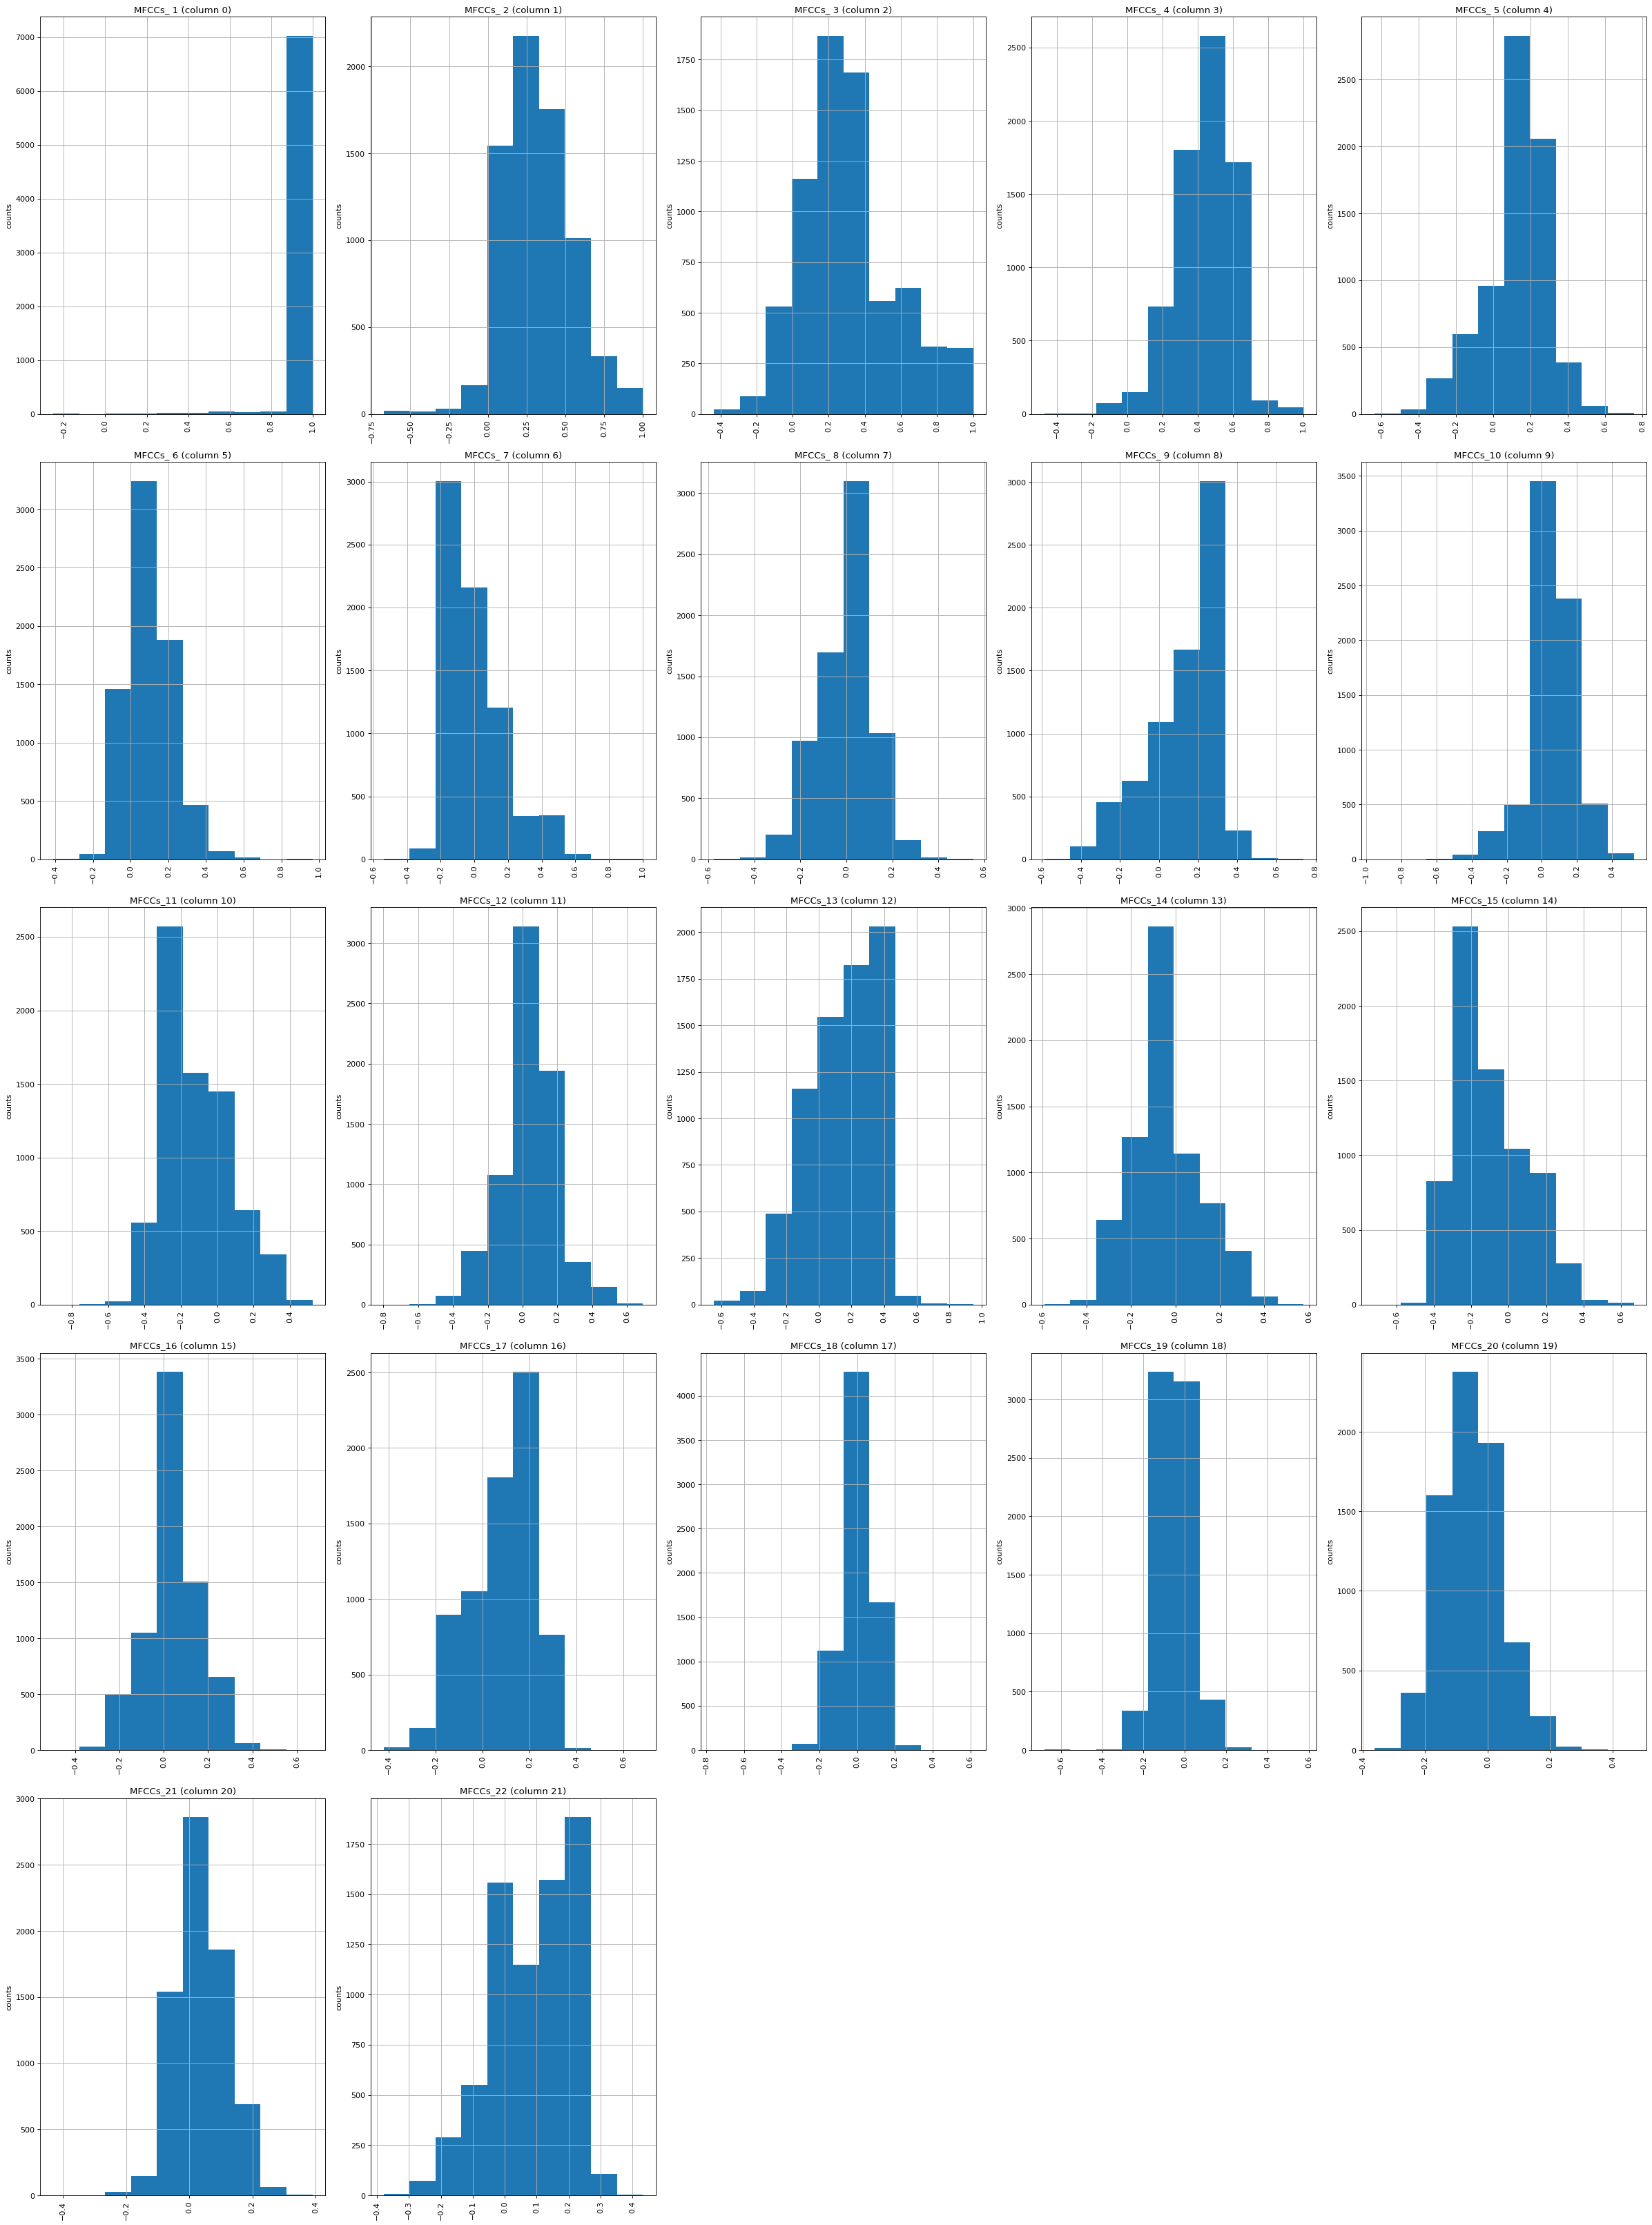

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig("features_distribution.png", bbox_inches='tight')
    plt.show()
    
plotPerColumnDistribution(df_frogs, 22, 5)

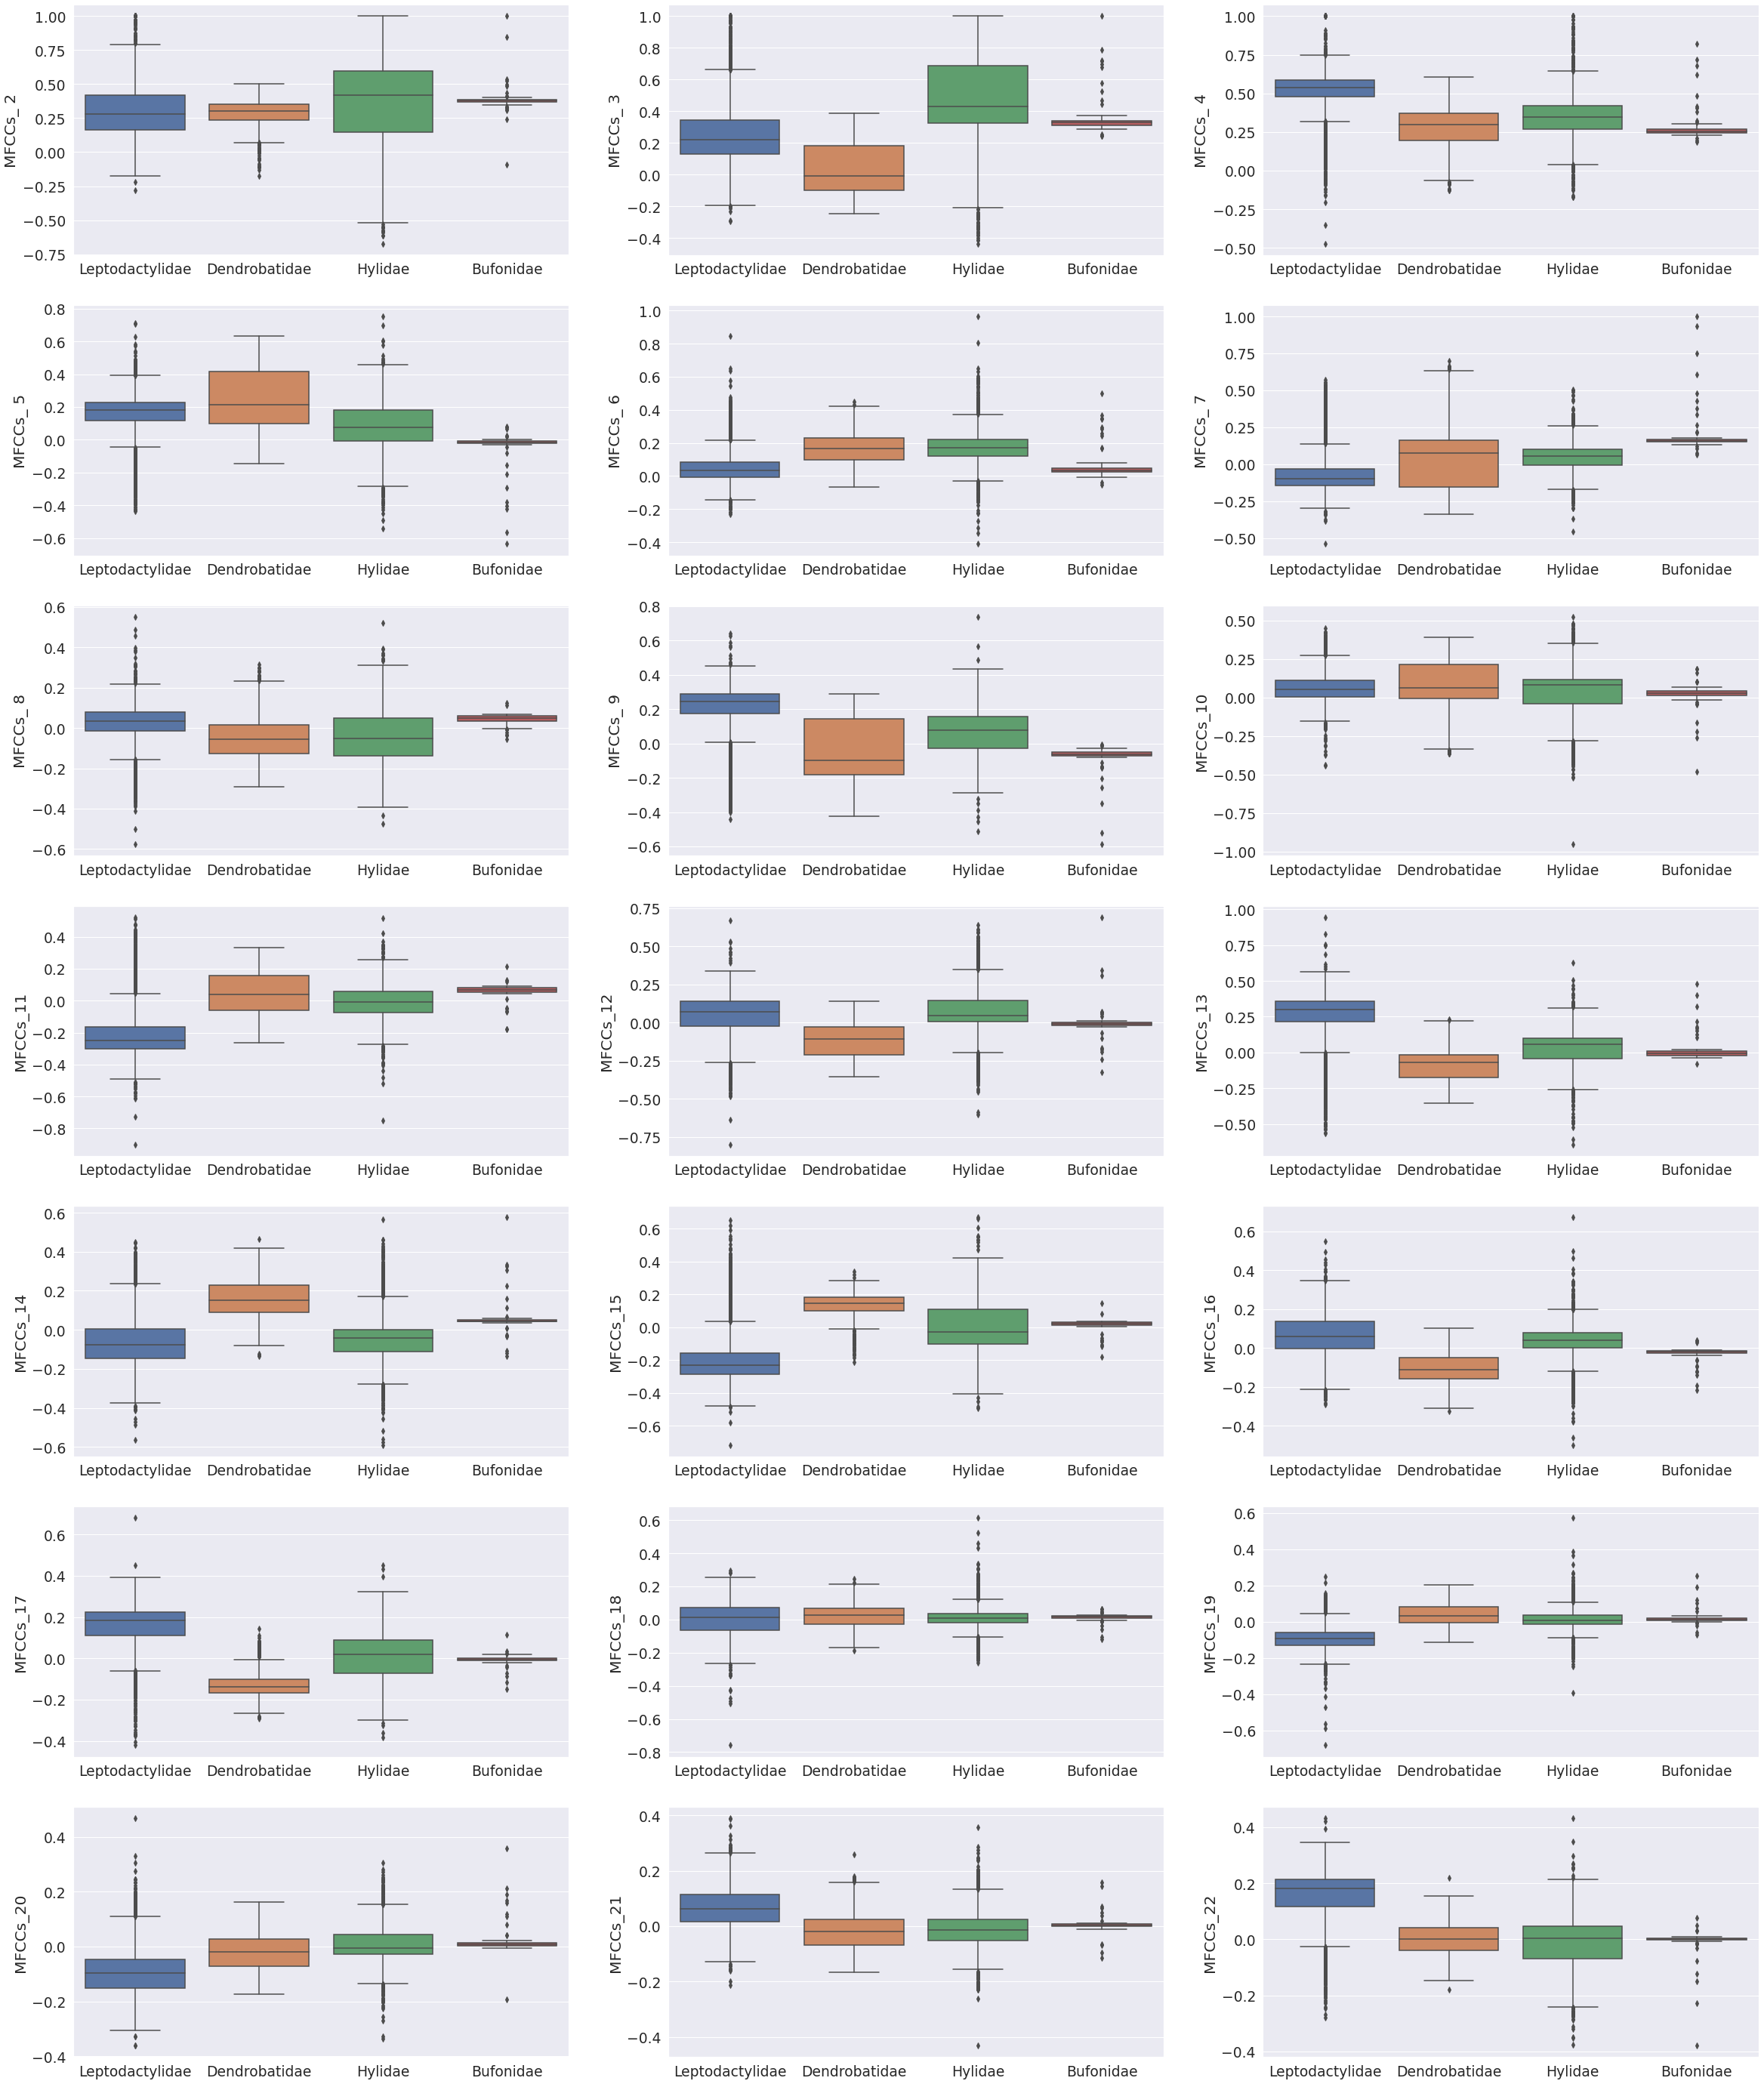

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()
sns.set(font_scale=1.7)

fig, axes = plt.subplots(7, 3, figsize = (40, 50))
#create boxplot in each subplot
columnNames = list(df_frogs)
col = 1
for i in range(7):
  for j in range(3):
    sns.boxplot(data=df_frogs, x='Family', y=columnNames[col], ax=axes[i,j]).set(xlabel=None)
    col+=1
    if col == 22:
      break

#plt.savefig('boxfam.eps', format='eps')

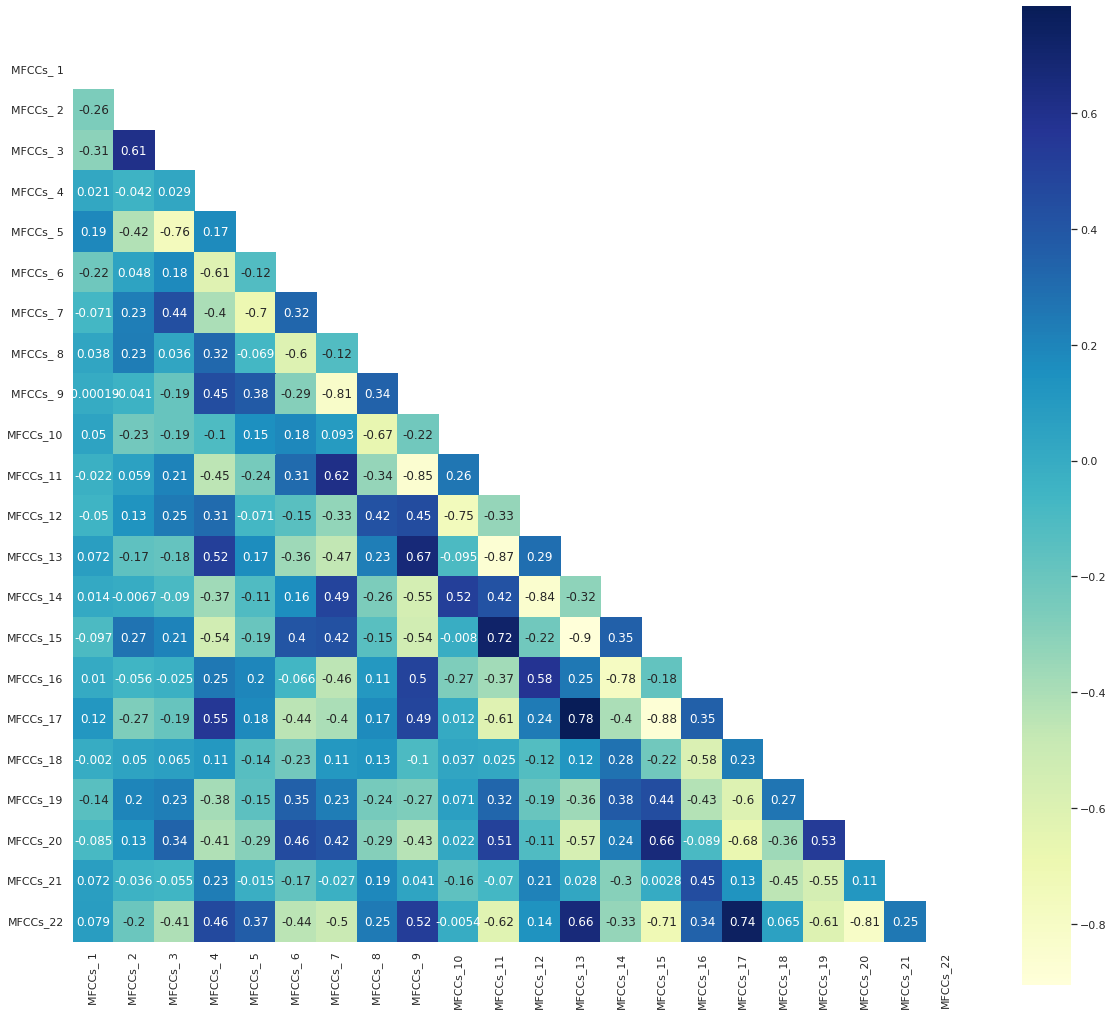

In [ ]:
sns.set(font_scale=1)
df_frogs.drop(['RecordID'], axis=1, inplace=True)
corrMatrix = df_frogs.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(20, 18))
  ax = sns.heatmap(corrMatrix, mask=mask, annot=True, square=True, cmap="YlGnBu")


#plt.savefig('corrmat.eps', format='eps')

# Data preparation

Family Distribution before: 
Leptodactylidae    61.431550
Hylidae            30.090341
Dendrobatidae       7.533009
Bufonidae           0.945101
Name: Family, dtype: float64
7195 instances

Family Distribution after outliers removal: 
Leptodactylidae    65.454210
Hylidae            26.237075
Dendrobatidae       7.237814
Bufonidae           1.070901
Name: Family, dtype: float64
5416 instances

Family Distribution after outliers removal: 
Leptodactylidae    63.648528
Hylidae            28.233720
Dendrobatidae       7.195956
Bufonidae           0.921796
Name: Family, dtype: float64
6726 instances



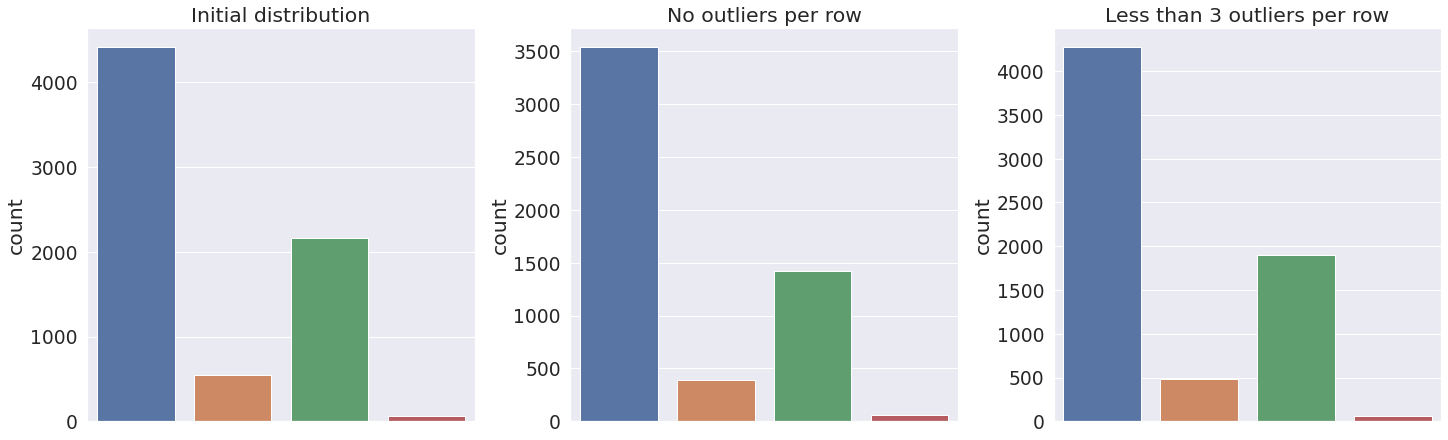

In [ ]:
import warnings
warnings.filterwarnings('ignore')


sns.set(font_scale=1.7)

Q1 = df_frogs.select_dtypes(include=np.number).quantile(0.25)
Q3 = df_frogs.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3-Q1

threshold=0
#print(IQR)
outliers_mask = ((df_frogs < Q1-1.5*IQR) | (df_frogs > Q3+1.5*IQR)).any(axis=1)
print("Family Distribution before: ")
print(df_frogs["Family"].value_counts()/df_frogs["Family"].count()*100)
print(str(len(df_frogs))+" instances")
print()
fig, axes = plt.subplots(1, 3, figsize = (20, 6), constrained_layout=True)
g = sns.countplot(df_frogs['Family'], ax=axes[0])
axes[0].get_xaxis().set_visible(False)
axes[0].title.set_text('Initial distribution')

df_frogs_no_outliers = df_frogs[~outliers_mask]
df_frogs_no_outliers = df_frogs_no_outliers.reset_index(drop=True)

print("Family Distribution after outliers removal: ")
print(df_frogs_no_outliers["Family"].value_counts()/df_frogs_no_outliers["Family"].count()*100)
g = sns.countplot(df_frogs_no_outliers['Family'], ax=axes[1])
axes[1].get_xaxis().set_visible(False)
axes[1].title.set_text('No outliers per row')
print(str(len(df_frogs_no_outliers))+" instances")
print()


outliers_per_row = ( ((df_frogs < (Q1 - 1.5 * IQR)) | (df_frogs > (Q3 + 1.5 * IQR)))  == True ).sum(axis=1)
df_frogs_outliers_below_thr = df_frogs[outliers_per_row<3]
df_frogs_outliers_below_thr = df_frogs_outliers_below_thr.reset_index(drop=True)
print("Family Distribution after outliers removal: ")
print(df_frogs_outliers_below_thr["Family"].value_counts()/df_frogs_outliers_below_thr["Family"].count()*100)
g = sns.countplot(df_frogs_outliers_below_thr['Family'], ax=axes[2])
axes[2].get_xaxis().set_visible(False)
axes[2].title.set_text('Less than 3 outliers per row')
print(str(len(df_frogs_outliers_below_thr))+" instances")
print()

#plt.savefig('outliers.eps', format='eps')



Text(0.5, 1.0, 'Distribution of outliers per row')

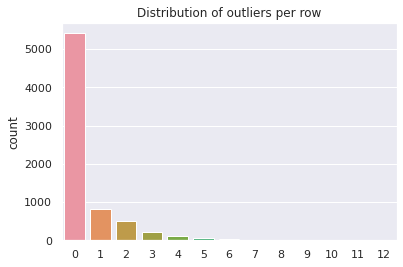

In [ ]:
sns.set(font_scale=1)
outliers_per_row = ( ((df_frogs < (Q1 - 1.5 * IQR)) | (df_frogs > (Q3 + 1.5 * IQR)))  == True ).sum(axis=1)
sns.countplot(outliers_per_row)
plt.title("Distribution of outliers per row")
#plt.savefig('outdist.eps', format='eps')

In [ ]:
#df_frogs = df_frogs_no_outliers

labels = df_frogs['Family']


X = df_frogs.drop(['MFCCs_ 1', 'Family', 'Species', 'Genus'], axis=1).values 
y = labels 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pca_frogs = PCA(n_components=0.9)
principalComponents_frogs_train = pca_frogs.fit_transform(X_train)
principalComponents_frogs_test = pca_frogs.transform(X_test)

In [ ]:
principal_frogs_Df_train = pd.DataFrame(data = principalComponents_frogs_train,
             columns = ['principal component '+ str(i+1) for i in range(len(principalComponents_frogs_train[0])) ] )

principal_frogs_Df_test = pd.DataFrame(data = principalComponents_frogs_test,
             columns = ['principal component '+ str(i+1) for i in range(len(principalComponents_frogs_test[0])) ] )


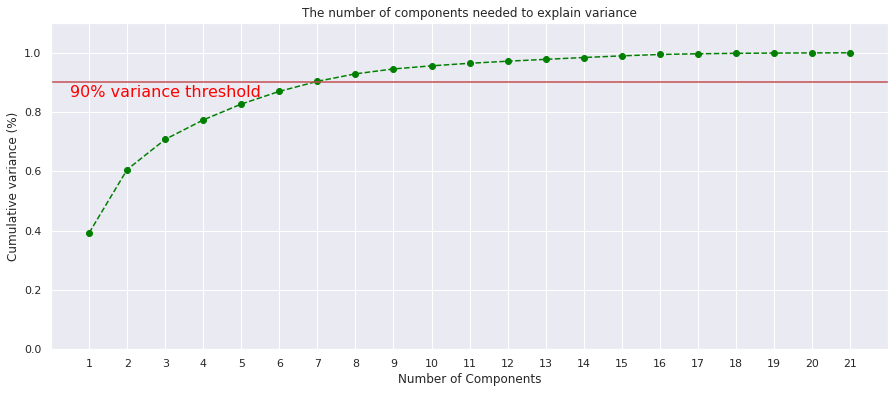

In [ ]:
# Plot the cumulative variance for each component
pca_test = PCA(n_components=21)
principalComponents_test = pca_test.fit_transform(X)

plt.figure(figsize = (15, 6))
components = np.arange(1, 22, step=1)
variance = np.cumsum(pca_test.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 22, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% variance threshold', color = 'red', fontsize=16)
plt.savefig('cumvar.eps', format='eps')
plt.show()

In [ ]:
print('Explained variation per principal component: {}'.format(pca_frogs.explained_variance_ratio_))

Explained variation per principal component: [0.39095502 0.2148043  0.10276075 0.0650966  0.05365684 0.04357571
 0.03370387]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

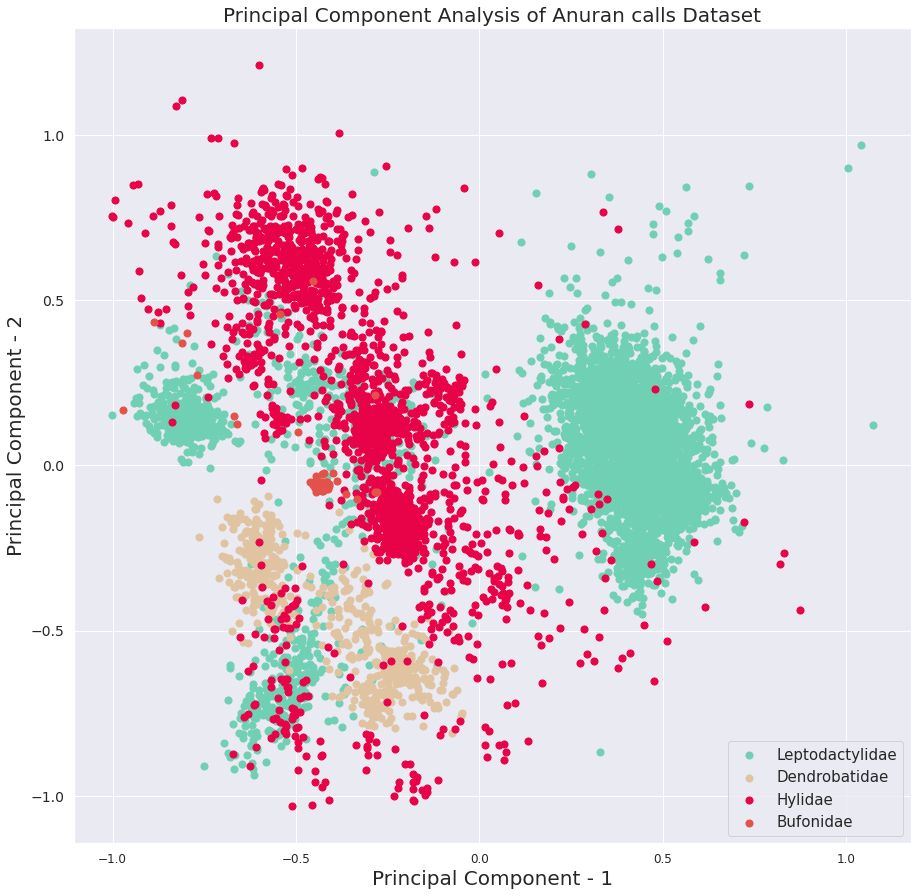

In [ ]:
principal_frogs_Df = pd.DataFrame(data = principalComponents_test[:, [0,1]],
             columns = ['principal component 1', 'principal component 2'] )
plt.figure()
plt.figure(figsize=(15,15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Anuran calls Dataset",fontsize=20)
targets = df_frogs["Family"].unique()
colors = []
for i in range(len(targets)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    plt.scatter(principal_frogs_Df.loc[indicesToKeep, 'principal component 1']
               , principal_frogs_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15}, loc='lower right')
plt.savefig('pca.eps', format='eps')

# *Models*

****Decision tree****

In [ ]:
#X_train = principal_frogs_Df_train.values
#X_test = principal_frogs_Df_test.values
#print(OneVsRestClassifier(DecisionTreeClassifier()).get_params().keys())
scorer = make_scorer(f1_score, average="weighted")
stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
pca = PCA(n_components=0.9)

In [ ]:
model = Pipeline([
        ('sampling', SMOTE()),
        #('pca', pca),
        ('clf', OneVsRestClassifier(DecisionTreeClassifier()))
        ])
params = [{'clf__estimator__criterion': ['gini', 'entropy'],
           'clf__estimator__max_depth': ['None', 10]  
           }]

gs_tree = GridSearchCV(model, param_grid = params, cv=stratified_kfold, n_jobs=-1, scoring=scorer)
gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_, gs_tree.best_score_)


{'clf__estimator__criterion': 'entropy', 'clf__estimator__max_depth': 10} 0.9537162282693321


In [ ]:
model = gs_tree.best_estimator_
y_pred = model.predict(X_test)
print(f'Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 0.9750498974803079


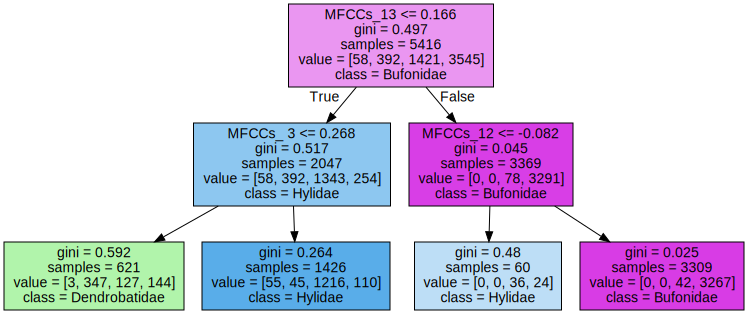

In [ ]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)  
#y_pred = model.predict(X_test)


import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names= df_frogs.drop(['MFCCs_ 1', 'Family', 'Species', 'Genus'], axis=1).columns,  
                                class_names=targets,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
#graph.render("decision_tree_graphivz")


**Random forest**

In [ ]:
model = Pipeline([
        ('sampling', SMOTE()),
        #('pca', pca),
        ('clf', OneVsRestClassifier(RandomForestClassifier()))
    ])
params = [{'clf__estimator__criterion': ['gini', 'entropy'],
           'clf__estimator__n_estimators': [50, 200, 500],
           'clf__estimator__bootstrap': [True, False]
         }]

gs_rf = GridSearchCV(model, param_grid = params, cv=stratified_kfold, n_jobs=-1, scoring=scorer)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_, gs_rf.best_score_)

{'clf__estimator__bootstrap': False, 'clf__estimator__criterion': 'entropy', 'clf__estimator__n_estimators': 50} 0.9937512163853357


In [ ]:
model = gs_rf.best_estimator_
y_pred = model.predict(X_test)
print(f'Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 0.9926014946438974


**KNN**

In [ ]:
model = Pipeline([
        ('sampling', SMOTE()),
        #('pca', pca),
        ('clf', OneVsRestClassifier(KNeighborsClassifier()))
    ])

k_range = list(range(1, 31))
params = [{'clf__estimator__n_neighbors': k_range
         }]



gs_knn = GridSearchCV(model, param_grid = params, cv=stratified_kfold, n_jobs=-1, scoring=scorer)
gs_knn.fit(X, y)
print(gs_knn.best_params_, gs_knn.best_score_)

{'clf__estimator__n_neighbors': 1} 0.992089291892513


In [ ]:
model = gs_knn.best_estimator_
y_pred = model.predict(X_test)
print(f'Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 1.0


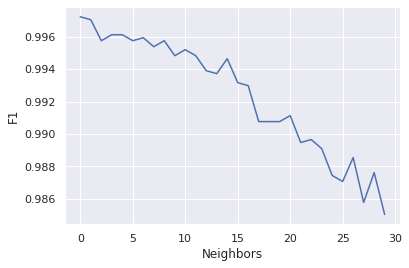

In [ ]:
#just to investigate the score with respect to the number of neighbors
k_range = list(range(1, 31))
kf = KFold(n_splits=5, shuffle=True)

err = np.zeros(30)

for k in k_range:
  scores = np.zeros(5)
  for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
      X_train = X[train_index]
      y_train = y[train_index]  
      X_test = X[test_index]
      y_test = y[test_index]  
      sm = SMOTE()
      X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(X_train_oversampled, y_train_oversampled)  
      y_pred = model.predict(X_test)
      scores[fold-1]=(model.score(X_test, y_test))
      report=classification_report(y_pred, y_test)
     
  
  err[k-1]= scores.mean()

plt.plot(err)
plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.savefig('knnF1.eps', format='eps', bbox_inches='tight')
plt.show()

**Logistic regression** 

In [ ]:
params = {'clf__estimator__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'clf__estimator__penalty' : ['l1', 'l2']}

model = Pipeline([
        ('sampling', SMOTE()),
        #('pca', pca),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

gs_lr = GridSearchCV(model, param_grid = params, cv=stratified_kfold, n_jobs=-1, scoring=scorer)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_, gs_lr.best_score_)

{'clf__estimator__C': 10, 'clf__estimator__penalty': 'l2'} 0.9174999734514728


In [ ]:
model = gs_lr.best_estimator_
y_pred = model.predict(X_test)
print(f'Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 0.9164979254086824


**SVM**

In [ ]:
model = Pipeline([
        ('sampling', SMOTE()),
        #('pca', pca),
        ('clf', OneVsRestClassifier(SVC()))
    ])

params = [{'clf__estimator__kernel': ['linear', 'rbf'],
           'clf__estimator__gamma': [1e-2, 1e-4],
           'clf__estimator__C': [0.1, 10, 100]
         }]


gs_svm = GridSearchCV(model, param_grid = params, cv=stratified_kfold, n_jobs=-1, scoring=scorer)
gs_svm.fit(X, y)
print(gs_svm.best_params_, gs_svm.best_score_)

{'clf__estimator__C': 100, 'clf__estimator__gamma': 0.0001, 'clf__estimator__kernel': 'linear'} 0.9615391087846505


In [ ]:
model = gs_svm.best_estimator_
y_pred = model.predict(X_test)
print(f'Weighted F1 score:', f1_score(y_test, y_pred, average='weighted'))

Weighted F1 score: 0.9612487146382598
